In [1]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
X = df.drop ( columns = ["CustomerID"] )

In [4]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
X['Gender']=X['Gender'].map({'Male':0,'Female':1})


In [9]:
bins=  [0,40,70,100]
labels = ['low','mid','high']

pd.crosstab(
    df['Gender'],
    pd.cut(df['Spending Score (1-100)'], bins=bins, labels=labels)
)

Spending Score (1-100),low,mid,high
Gender,,,
Female,34,46,32
Male,29,37,22


In [12]:
X.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [15]:
X = X.iloc[:, [2, 3]].values

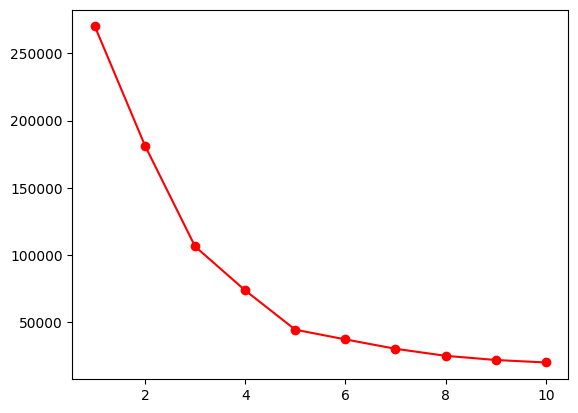

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, 'ro-')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [32]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score for k=5: {score:.2f}')

Silhouette Score for k=5: 0.55


In [33]:
new_labels = kmeans.predict([[15,39]])
new_labels

array([4], dtype=int32)

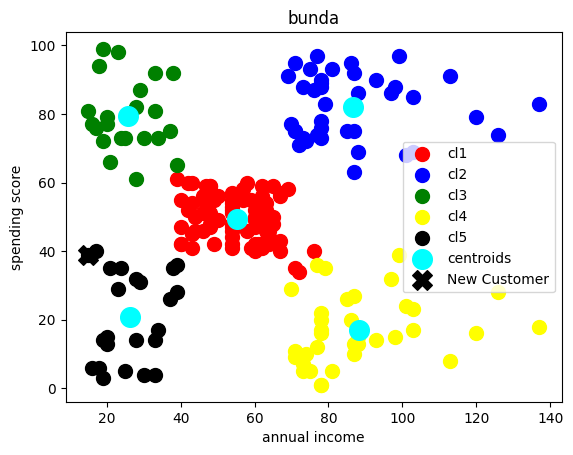

In [35]:
clusters = ["cl1", 'cl2','cl3', "cl4", "cl5"]
colors = ["red", "blue", "green", "yellow", "black"]
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c = colors[i], label = clusters[i])

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c = "cyan",label = "centroids")
plt.scatter(15, 39, s=200, c='black', marker='X', label='New Customer')

plt.title("bunda")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()